# Блок 1.

С помощью symPy найдите полиномы, описывающие данные наборы точек. Затем проведите полное исследование каждого полученного полинома: проверьте четность/нечетность, найдите нули, промежутки знакопостоянства. Постройте их графики. С помощью изменения промежутка для х добейтесь того, чтобы все нули были отображены на графике функции. <br><br><br>
а) $(-4; -4268), (-3; -1227), (-1; -17), (1; 17), (3; 1227), (4; 4268)$<br><br>
б)$ (-4; -16729), (-3; -3999), (-1; 5), (1; 1), (3; 4005), (4; 16735)$


In [192]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

In [193]:
def solve_equations(points):
    equations = []
    s = symbols(','.join(f"a{i}" for i in range(len(points))))

    for i in range(len(points)):
        equations.append(s[0]-points[i][1])

        for j in range(1, len(points)):
            equations[i] += s[j]*pow(points[i][0], j)

    return nonlinsolve(equations, s).args[0]

In [194]:
def analytic_interpolation(points):
    a = solve_equations(points)
    x = np.linspace(-15, 15, num=1000)
    print(a)

    plt.plot(x, sum(a[i]*pow(x, i) for i in range(len(a))))
    x, y = [x for x, y in points], [y for x, y in points]
    plt.scatter(x, y, c='r')
    plt.ylim(min(*points, key=lambda a: a[1])[1] - 5, max(*points, key=lambda a: a[1])[1] + 5)
    plt.xlim(min(*points, key=lambda a: a[0])[0] - 5, max(*points, key=lambda a: a[0])[0] + 5)

In [195]:
def make_poly(symbol, ks):
    p = sum(ks[i]*pow(symbol, i) for i in range(len(ks)))

    print(p)

    if all(p.subs(symbol, -i/10) == p.subs(symbol, i/10) for i in range(-100, 100)):
        print('Четный')
    elif all(p.subs(symbol, -i/10) == -p.subs(symbol, i/10) for i in range(-100, 100)):
        print('Нечетный')
    else:
        print('Общего вида')

    print("p>0: ", solve_univariate_inequality(p>0, symbol))
    print("p=0: ", solve(p))
    print("p<0: ", solve_univariate_inequality(p<0, symbol))

3*x**5 + 19*x**3 - 5*x
Нечетный
p>0:  ((x < oo) & (sqrt(-19/6 + sqrt(421)/6) < x)) | ((x < 0) & (-sqrt(-19/6 + sqrt(421)/6) < x))
p=0:  [0, -I*sqrt(19/6 + sqrt(421)/6), I*sqrt(19/6 + sqrt(421)/6), -sqrt(-19/6 + sqrt(421)/6), sqrt(-19/6 + sqrt(421)/6)]
p<0:  ((0 < x) & (x < sqrt(-19/6 + sqrt(421)/6))) | ((-oo < x) & (x < -sqrt(-19/6 + sqrt(421)/6)))
(0, -5, 0, 19, 0, 3)


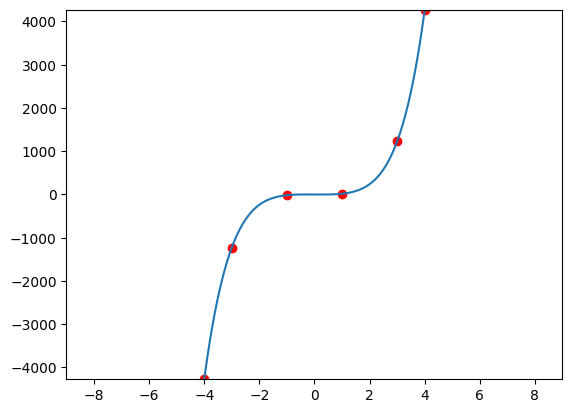

In [196]:
points1 = ((-4, -4268), (-3, -1227), (-1, -17), (1, 17), (3, 1227), (4, 4268))

x = Symbol('x')
make_poly(x, solve_equations(points1))
analytic_interpolation(points1)

3*x**5 + 19*x**3 - 5*x
Нечетный
p>0:  ((x < oo) & (sqrt(-19/6 + sqrt(421)/6) < x)) | ((x < 0) & (-sqrt(-19/6 + sqrt(421)/6) < x))
p=0:  [0, -I*sqrt(19/6 + sqrt(421)/6), I*sqrt(19/6 + sqrt(421)/6), -sqrt(-19/6 + sqrt(421)/6), sqrt(-19/6 + sqrt(421)/6)]
p<0:  ((0 < x) & (x < sqrt(-19/6 + sqrt(421)/6))) | ((-oo < x) & (x < -sqrt(-19/6 + sqrt(421)/6)))
(3, -25, 0, 7, 0, 16)


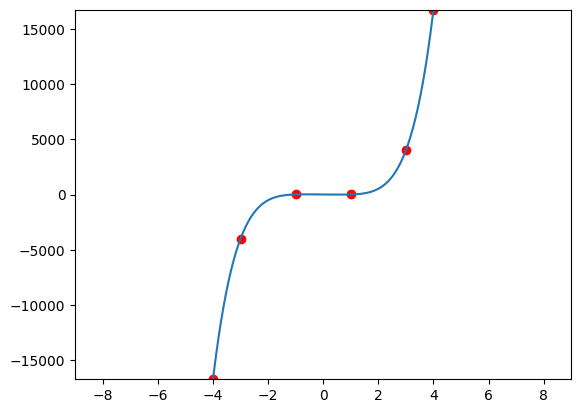

In [213]:
points2 = ((-4, -16729), (-3, -3999), (-1, 5), (1, 1), (3, 4005), (4, 16735))
x = Symbol('x')
make_poly(x, solve_equations(points1))
analytic_interpolation(points2)

# Блок 2.

In [198]:
from sympy import *
from sympy.plotting import plot
init_printing(use_unicode=False, wrap_line=False, no_global=True)

In [199]:
import matplotlib.pyplot as plt
import numpy as np

In [200]:
x = Symbol('x')

## 1.
### Получите значение MSE меньшее 5.

In [201]:
def print_points_ands_function1(sympy_function):
    def function(x_): return float(sympy_function.subs(x, x_))
    
    points_X = np.array([-2, -1, 0, 1, 2, 3, 3.5, 4, 4.5, 5])
    points_Y = np.array([2, -4, 1, 8, 21, 40, 47, 65, 75, 92])
    plt.xlim(-6, 10)
    plt.ylim(-1, 100)
    
    plt.scatter(points_X, points_Y, c='r')
    x_range = np.linspace(plt.xlim()[0], plt.xlim()[1], num=100)
    function_Y = [function(x_) for x_ in x_range]
    plt.plot(x_range, function_Y, 'b')
    plt.show()
    
    MSE = sum([(points_Y[i] - function(points_X[i]))**2 for i in range(len(points_Y))]) / len(points_Y)
    print(f'MSE = {MSE}')

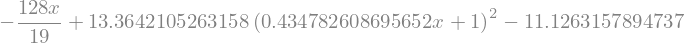

In [202]:
# f1 = 48 * x**2 - 128 * x + 83
f1 = (48 * (x+2.3)**2 - 128 * (x+2.3) + 83)/19
f1

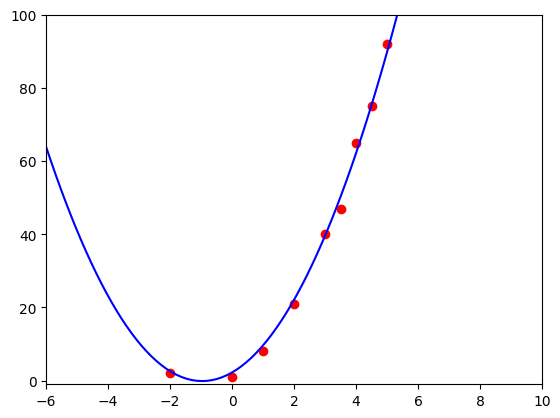

MSE = 4.4537462603878


In [203]:
print_points_ands_function1(f1)

## 2.
### Получите значение MSE меньшее 35.

In [204]:
def print_points_ands_function2(sympy_function):
    def function(x_): return float(sympy_function.subs(x, x_))
    
    points_X = np.array([-2, -1, 0, 1, 2, 3, 3.5, 4, 4.5, 5])
    points_Y = np.array([-31, -9, 4, -1, 9, 24, 47, 92, 120, 170])
    plt.xlim(-3, 6)
    plt.ylim(-35, 200)
    
    plt.scatter(points_X, points_Y, c='r')
    x_range = np.linspace(plt.xlim()[0], plt.xlim()[1], num=100)
    function_Y = [function(x_) for x_ in x_range]
    plt.plot(x_range, function_Y, 'b')
    plt.show()
    
    MSE = sum([(points_Y[i] - function(points_X[i]))**2 for i in range(len(points_Y))]) / len(points_Y)
    print(f'MSE = {MSE}')

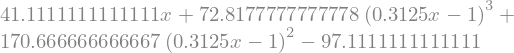

In [205]:
# f2 = 4 * x**3 + 30 * x**2 + 74 * x + 62
f2 = (4 * (x-3.2)**3 + 30 * (x-3.2)**2 + 74 * (x-3.2) + 62)/1.8
f2

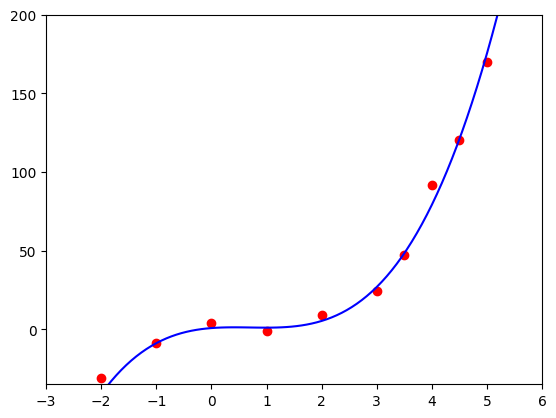

MSE = 33.67350123456803


In [206]:
print_points_ands_function2(f2)

## 3.
### Получите значение MSE меньшее 3300.

In [207]:
def print_points_ands_function3(sympy_function):
    def function(x_): return float(sympy_function.subs(x, x_))
    
    points_X = np.array([-2, -1, 0, 1, 2, 3, 3.5, 4, 4.5, 5])
    points_Y = np.array([60, 25, 4, -0, -57, -195, -295, -540, -700, -760])
    plt.xlim(-10, 6)
    plt.ylim(-850, 100)
    
    plt.scatter(points_X, points_Y, c='r')
    x_range = np.linspace(plt.xlim()[0], plt.xlim()[1], num=100)
    function_Y = [function(x_) for x_ in x_range]
    plt.plot(x_range, function_Y, 'b')
    plt.show()
    
    MSE = sum([(points_Y[i] - function(points_X[i]))**2 for i in range(len(points_Y))]) / len(points_Y)
    print(f'MSE = {MSE}')

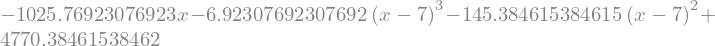

In [208]:
# f3 = -36 * x**3 - 756 * x**2 - 5334 * x - 12636
f3 = (-36 * (x-7)**3 - 756 * (x-7)**2 - 5334 * (x-7) - 12636)/5.2 + 20
f3

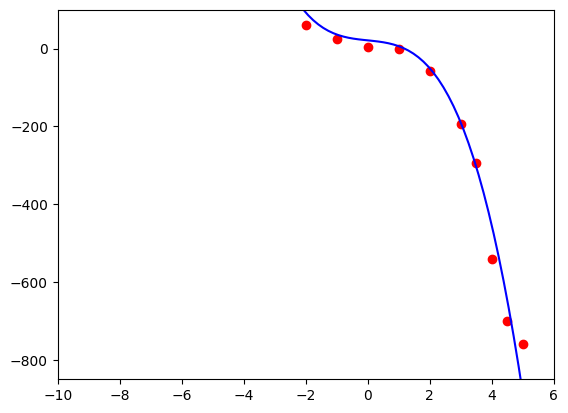

MSE = 2746.917529585803


In [209]:
print_points_ands_function3(f3)

## 4.
### Получите значение MSE меньшее 25.

In [210]:
def print_points_ands_function4(sympy_function):
    def function(x_): return float(sympy_function.subs(x, x_))
    
    points_X = np.array([-2, -1, 0, 1, 2, 3, 3.5, 4, 4.5, 5])
    points_Y = np.array([-42, -37, -23, -36, -45, -80, -83, -110, -131, -155])
    plt.xlim(-4, 20)
    plt.ylim(-160, -10)
    
    plt.scatter(points_X, points_Y, c='r')
    x_range = np.linspace(plt.xlim()[0], plt.xlim()[1], num=100)
    function_Y = [function(x_) for x_ in x_range]
    plt.plot(x_range, function_Y, 'b')
    plt.show()
    
    MSE = sum([(points_Y[i] - function(points_X[i]))**2 for i in range(len(points_Y))]) / len(points_Y)
    print(f'MSE = {MSE}')

In [211]:
# f4 = - 5 / 4 * x**2 + 25 * x - 152
f4 = (- 5 / 4 * (x+10)**2 + 25 * (x+10) - 152)*3.9 + 75
f4

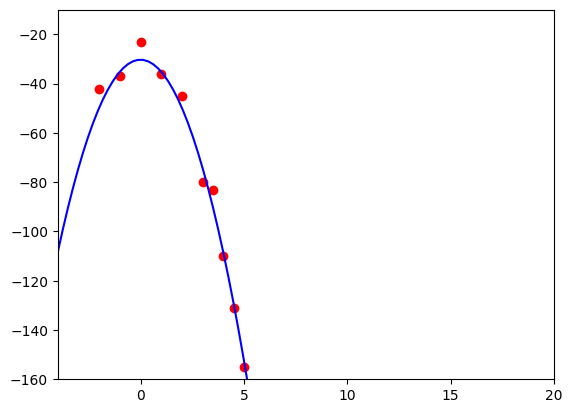

MSE = 23.917070312500037


In [212]:
print_points_ands_function4(f4)